## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
import pandas as pd
import json
import folium
import os
import xlrd
import statsmodels.formula.api as sm
from statsmodels.multivariate.pca import PCA
import seaborn as sns

In [2]:
data_folder = 'data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

In [3]:
#PART A
#We load the dataset
county = pd.read_csv(data_folder + 'acs2015_county_data.csv')

#We explore it..
display(county.head(5))
display(county.tail(5))

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3
3219,72153,Puerto Rico,Yauco,39474,19047,20427,99.5,0.5,0.0,0.0,...,1.6,0.7,3.1,24.6,8923,68.0,27.6,4.4,0.0,27.1


In [4]:
#We look for NaN values..
county.isnull().sum().sum()

3

In [5]:
#And where they are located...
county.isnull().any()

CensusId           False
State              False
County             False
TotalPop           False
Men                False
Women              False
Hispanic           False
White              False
Black              False
Native             False
Asian              False
Pacific            False
Citizen            False
Income              True
IncomeErr           True
IncomePerCap       False
IncomePerCapErr    False
Poverty            False
ChildPoverty        True
Professional       False
Service            False
Office             False
Construction       False
Production         False
Drive              False
Carpool            False
Transit            False
Walk               False
OtherTransp        False
WorkAtHome         False
MeanCommute        False
Employed           False
PrivateWork        False
PublicWork         False
SelfEmployed       False
FamilyWork         False
Unemployment       False
dtype: bool

Here we are interested in the dependency between the Income per capita ($) and the self employment percentage (%). We can see that there is no NaN values in our variable of interest so we didn't remove it. By looking to the graph above it is difficult to conclude to a dependency between these two variables.

Several way exist to investigate dependancy between two variables. First, we can look to Pearson correlation that indicates the extent to which two variables are linearly related. 

But what if the variable are related but non-linearly ? In this case Rank correlation coefficients such as Spearman need to be used. It measure the extent to which, as one variable increases, the other variable tends to increase, without requiring that increase to ne represented by a linear relationship.

todo:

density instead of scatter


In [6]:
#We look for Pearson correlation
display(county.corr(method='pearson')['IncomePerCap']['SelfEmployed'])

0.08727386609551845

In [7]:
#We look for Spearman correlation
display(county.corr(method='spearman')['IncomePerCap']['SelfEmployed'])

0.05641367305318987

We can see that both values are really weak (<0.1) and thus we can conclude that these two variables are not correlated for this dataset.

Another way to look for dependency is OLS regression. If the coefficient for the independant variable is statistically different from 0, it significates that these variable have a statistical signifiant effect. But in order to have meaningfull results several assumptions must hold :

A1. The linear regression model is “linear in parameters.”

A2. There is a random sampling of observations.

A3. The conditional mean should be zero.

A4. There is no multi-collinearity (or perfect collinearity).

A5. Spherical errors: There is homoscedasticity and no autocorrelation

A6: Optional Assumption: Error terms should be normally distributed.

From here, there is two assumptions that we cannot confirm. First, we do not know if the model is linear in parameters (it seems not from the visualization) and second we are not sure that there is not multicollinearity.



In [8]:
#We look to the result of regression 
result=sm.ols(formula="IncomePerCap ~ SelfEmployed",data=county).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           IncomePerCap   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     24.70
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           7.05e-07
Time:                        14:29:44   Log-Likelihood:                -32676.
No. Observations:                3220   AIC:                         6.536e+04
Df Residuals:                    3218   BIC:                         6.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.288e+04    246.159     92.967   

Just to observe the regression output, we chose to run the OLS regression. We have been asked to not add additionnal features so our model just take self employment as independant variable.

From the outputs above we can see that the coefficient is significantly non-null since P>|t| = 0.000. The coefficient is 22 880 but we cannot say from it that an increase of 1% in self employment will lead to an increase of Income per Capita of 22 880. Why ?
First, by looking to the R-squarred coefficient. It shows that this model can only explain 8% of the variance of Income Per Capita. It is way too low. Second, because we do not take any supplementary feature in account which could lead to Omitted Variable Bias (when a statistical model leaves out one or more relevant variables). This bias results in the model attributing the effect of the missing variables to the estimated effects of the included variable (Self employment here).

What could be done in order to solve this is to integer new feature from dataset. Partial Least Squares Regression (PLS) or Principal Components Analysis (PCA) could then be use to cut the number of predictors to a smaller set of uncorrelated components. 

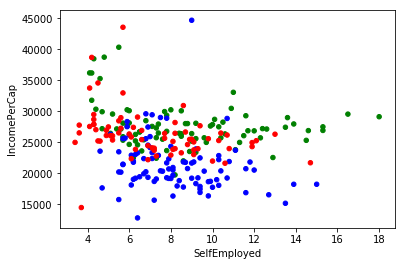

In [21]:
#PART B
setA = ['Wisconsin', 'Tennessee', 'Minnesota']
county_setA = county.loc[county['State'].isin(setA),['State','SelfEmployed','IncomePerCap']]


colors = {'Wisconsin':'red', 'Tennessee':'blue', 'Minnesota':'green'}



county_setA.plot.scatter(x='SelfEmployed',y='IncomePerCap',c=county_setA['State'].apply(lambda x: colors[x]))

In [ ]:
display(county_setA[county_setA['State']=='Wisconsin'].corr(method='pearson')['IncomePerCap']['SelfEmployed'])
display(county_setA[county_setA['State']=='Tennessee'].corr(method='pearson')['IncomePerCap']['SelfEmployed'])
display(county_setA[county_setA['State']=='Minnesota'].corr(method='pearson')['IncomePerCap']['SelfEmployed'])

In [ ]:
county_setA

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

In [ ]:
county_pca=county[county.columns[-34:]]


county_pca.dropna(axis='index',how='any',inplace=True)


county_pca.isnull().any()

rc=PCA(county_pca,ncomp=10)


In [ ]:
rc.scores

In [ ]:
rc

In [ ]:
county_pca

In [ ]:
result=sm.ols(formula="IncomePerCap ~ SelfEmployed + TotalPop + Men + Women + Hispanic + White + Black + Native + Asian + Pacific + Citizen + Income + IncomeErr + IncomePerCapErr + Poverty + ChildPoverty + Professional + Service + Office + Construction + Production + Drive + Carpool + Transit + Walk + OtherTransp + WorkAtHome + MeanCommute + Employed + PrivateWork + PublicWork + FamilyWork ",data=county_pca_2).fit()
print(result.summary())